In [1]:
#引入库
import pandas as pd
import numpy as np
import datetime
import time
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['Arial Unicode MS']
matplotlib.rcParams['axes.unicode_minus']=False

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
plt.rcParams['font.sans-serif']=['simhei']
plt.rcParams['font.serif'] = ['simhei']

import warnings
warnings.filterwarnings('ignore')
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\SimHei.ttf',size=12)
sns.set(font=myfont.get_name())

In [2]:
#数据读取，并打印前4行
df = pd.read_csv('信息接收维度.csv')

In [3]:
#数据处理：缺失值检查,false即表示无缺失值,若对行处理则令axis=1
print(df.isnull().any())

personid        False
score           False
receive_time    False
dtype: bool


In [4]:
#数据处理：去除重复值,使用drop_duplicates函数，输出为重复值数
df.duplicated().sum()

0

In [5]:
#基于pyspark的数据统计分析，此处仅使用描述分析与频率统计
#mean()函数或describe()函数对均值进行描述统计.T表示矩阵逆置，行输出
df.describe().T

,count,mean,std,min,25%,50%,75%,max
personid,621.0000,137114974.5282,26038902.1593,51455892.0000,111947139.0000,147383116.0000,147392692.0000,197689443.0000
score,621.0000,86.5390,14.6209,20.0000,84.4000,93.3000,95.0000,99.9000
receive_time,621.0000,75.0504,30.1091,7.4104,52.0257,80.8757,100.3729,130.4924


In [6]:
#rename，更改列名以方便可视化展现
df.rename(columns={'personid':'学生编号','score':'分数','receive_time':'接收处理信息耗时'},inplace=True)
df

,学生编号,分数,接收处理信息耗时
0,147392953,60.0000,7.4104
1,197685377,50.0000,8.4174
2,197685548,50.0000,8.4174
3,197686980,50.0000,8.4174
4,197687904,50.0000,8.4174
...,...,...,...
616,111943631,80.0000,115.5903
617,111944904,80.0000,121.7743
618,147392989,70.0000,126.4715
619,197254415,85.0000,130.4840


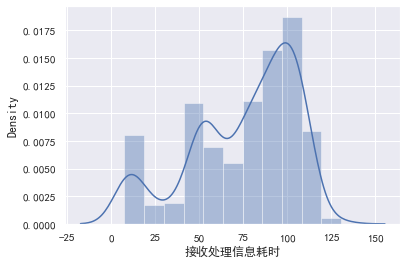

In [7]:
sns.distplot(df["接收处理信息耗时"],kde = True,label = '频率')
plt.show()

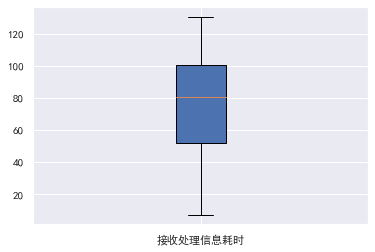

In [8]:
d1 = df['接收处理信息耗时']
# 横坐标，显示均值
plt.boxplot(d1,patch_artist=True,labels=['接收处理信息耗时'])
plt.show()

In [9]:
# 箱型图判断异常点
def box_outlier(data):
    df = data.copy(deep=True)
    out_index = []
    for col in df.columns:             # 对每一列分别用箱型图进行判断
        Q1 = df[col].quantile(q=0.25)       # 下四分位
        Q3 = df[col].quantile(q=0.75)       # 上四分位
        low_whisker = Q1 - 1.5 * (Q3 - Q1)  # 下边缘
        up_whisker = Q3 + 1.5 * (Q3 - Q1)   # 上边缘
        
        # 寻找异常点,获得异常点索引值，删除索引值所在行数据
        rule = (df[col] > up_whisker) | (df[col] < low_whisker)  
        out = df[col].index[rule]
        out_index += out.tolist()  
    df.drop(out_index, inplace=True)
    return df

df_clean = box_outlier(df)
df_clean

,学生编号,分数,接收处理信息耗时
33,147393692,90.0000,8.5743
34,147391659,70.0000,8.6618
35,111944803,70.0000,8.8299
40,147381317,80.0000,12.6569
41,111946884,80.0000,12.6576
...,...,...,...
616,111943631,80.0000,115.5903
617,111944904,80.0000,121.7743
618,147392989,70.0000,126.4715
619,197254415,85.0000,130.4840


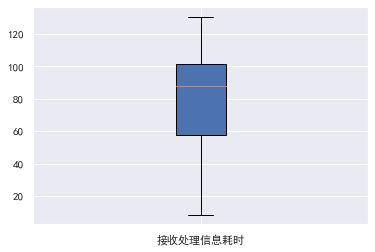

In [10]:
d1_clean = df_clean['接收处理信息耗时']
# 横坐标，显示均值
plt.boxplot(d1_clean,patch_artist=True,labels=['接收处理信息耗时'])
plt.show()

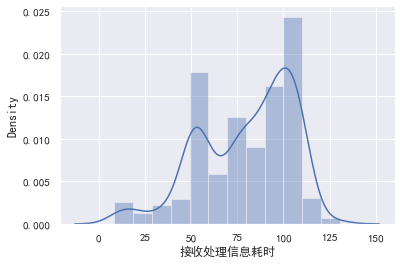

In [11]:
# 单变量分布直方图
# kde核密度走势图，rug胡须下线，线越多表示数量越密
sns.distplot(df_clean["接收处理信息耗时"],kde = True,label = '频率')
plt.show()

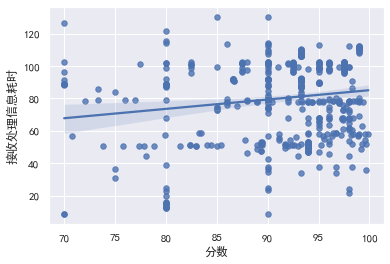

In [12]:
# 线性回归关系图
sns.regplot(x='分数',y='接收处理信息耗时',data=df_clean,scatter_kws={'marker':'.','s':30},line_kws={'color':'b'})

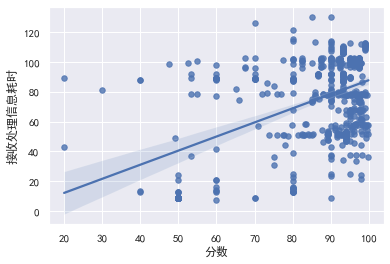

In [13]:
# 线性回归关系图
sns.regplot(x='分数',y='接收处理信息耗时',data=df,scatter_kws={'marker':'.','s':30},line_kws={'color':'b'})

In [17]:
import pandas as pd

# 读取csv文件
df = pd.read_csv('信息接收维度.csv')

# 按照col列排序
df = df.sort_values(by=['receive_time'])

# 计算before型和after型的划分点
n = len(df)
split1 = int(n * 0.16)
split2 = n - split1

# 划分before型和after型
df_before = df.iloc[:split1, :]
df_after = df.iloc[split2:, :]

# 将before型和after型的数据输出到txt文件中
with open('信息接收_散点图.txt', 'w') as f:
    f.write('[{"dimensions":["拖延型"],"source":[')
    for i, row in df_before.iterrows():
        f.write('[{},{}],'.format(row['receive_time'], row['score']))
    f.write(']},{"dimensions":["积极型"],"source":[')
    for i, row in df_after.iterrows():
        f.write('[{},{}],'.format(row['receive_time'], row['score']))
    f.write(']}]')
